### **Вводная**:

ничего нет, но все надо.


### **Цель исследования:** 

описать данные, покупателей, сегментировать клиентов, дать на что опереться отделу маркетинга.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns


pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_excel('for_clustering.xlsx')

In [3]:
display(df.describe())
display(df.info())
df.sample(5)

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,Count_city,Tenure,SKU_meanbytransac,Amount_last6mnth,Check_qntlast6mnth,SKU_price_mean,Age,Interval_visit,Days_pastvisit,Cat_householdchem_qnt,Cat_householdchem_amount,Cat_householdchem_share,Cat_careproducts_qnt,Cat_careproducts_amount,Cat_careproducts_share,Cat_toiletries_qnt,Cat_toiletries_amount,Cat_toiletries_share,Cat_healthwellnes_qnt,Cat_healthwellnes_amount,Cat_healthwellnes_share,Cat_babyprod_qnt,Cat_babyprod_amount,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
count,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27356.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000
mean,210314.227534,314.792325,31.457212,2.565363,159.516226,82.467500,9595.761182,764.242293,26.742911,3.858550,1.079613,9.872401,4.235095,1137.986565,8.016613,13.233163,43.024492,16.040461,5.291915,153.123346,2212.690888,0.230468,206.294569,3193.837092,0.326968,311.619056,2905.685814,0.307797,62.303475,725.944267,0.076154,30.901847,557.603120,0.058614,0.999964,0.547368,40.344009,8.395158,936.135833,0.998073,0.920823,2.002836,2.002836
std,121828.905739,144.491147,11.379580,1.205160,111.533576,63.241479,4715.290935,451.728512,4.038126,2.757808,0.295729,2.120812,2.899742,490.755079,6.947595,4.984101,14.269920,6.420182,4.548674,109.706269,1386.636725,0.085635,137.099159,2019.471803,0.114520,246.678994,1844.887500,0.123203,49.729726,586.075099,0.048594,24.865939,557.239232,0.048882,0.006029,0.497760,23.765321,7.217166,590.934045,0.043853,0.270020,0.776181,0.776181
min,5743.000000,34.474000,2.000000,2.000000,10.239800,4.000000,739.360000,33.000000,7.000000,1.000000,1.000000,2.000000,0.000000,549.030000,0.000000,2.042535,0.000000,11.000000,0.000000,1.000000,9.270000,0.002708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,99.000000,0.000000,0.000000,1.000000,1.000000
25%,105405.500000,213.042000,23.000000,2.000000,85.728675,39.000000,5897.177500,433.000000,24.000000,2.000000,1.000000,8.000000,2.000000,747.505000,3.000000,9.903953,32.000000,12.000000,2.000000,76.000000,1192.252500,0.171995,105.000000,1676.410000,0.248302,142.000000,1581.217500,0.221140,29.000000,303.958750,0.041349,14.000000,168.867500,0.022734,1.000000,0.000000,22.000000,3.000000,446.880000,1.000000,1.000000,1.000000,1.000000
50%,211786.000000,289.220350,31.000000,2.000000,128.752500,66.000000,8820.700000,674.000000,27.000000,3.000000,1.000000,10.000000,4.000000,1000.135000,6.000000,12.426685,41.000000,13.000000,4.000000,127.000000,1926.945000,0.223681,177.000000,2771.710000,0.319790,246.000000,2499.825000,0.291659,50.000000,570.345000,0.067024,25.000000,390.972500,0.047616,1.000000,1.000000,37.000000,6.000000,825.895000,1.000000,1.000000,2.000000,2.000000
75%,309746.250000,385.379300,41.000000,2.000000,199.252325,108.000000,12631.300000,1003.000000,30.000000,5.000000,1.000000,12.000000,6.000000,1411.710000,11.000000,15.572424,54.000000,18.000000,7.000000,200.000000,2940.015000,0.279677,276.000000,4304.200000,0.397748,412.000000,3770.692500,0.376667,82.000000,979.432500,0.100419,41.000000,762.786250,0.081647,1.000000,1.000000,55.000000,11.000000,1329.787500,1.000000,1.000000,3.000000,3.000000
max,830188.000000,2180.013700,51.000000,20.000000,1326.115700,990.000000,22748.390000,5058.000000,38.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27508 entries, 0 to 27507
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id_client                 27508 non-null  int64  
 1   InWeek_amount             27508 non-null  float64
 2   InWeek_SKU                27508 non-null  int64  
 3   Checkinmonth_average      27508 non-null  int64  
 4   Checkamount_mean          27508 non-null  float64
 5   Count_transac             27508 non-null  int64  
 6   Total_amount              27508 non-null  float64
 7   Total_SKU_qnt             27508 non-null  int64  
 8   Count_departments         27508 non-null  int64  
 9   Count_shop                27508 non-null  int64  
 10  Count_city                27508 non-null  int64  
 11  Tenure                    27508 non-null  int64  
 12  SKU_meanbytransac         27508 non-null  int64  
 13  Amount_last6mnth          27508 non-null  float64
 14  Check_

None

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,Count_city,Tenure,SKU_meanbytransac,Amount_last6mnth,Check_qntlast6mnth,SKU_price_mean,Gender,Age,Age_group,Interval_visit,Days_pastvisit,Cat_householdchem_qnt,Cat_householdchem_amount,Cat_householdchem_share,Cat_careproducts_qnt,Cat_careproducts_amount,Cat_careproducts_share,Cat_toiletries_qnt,Cat_toiletries_amount,Cat_toiletries_share,Cat_healthwellnes_qnt,Cat_healthwellnes_amount,Cat_healthwellnes_share,Cat_babyprod_qnt,Cat_babyprod_amount,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
18016,271292,461.1342,26,2,188.2996,63,11989.49,805,30,2,1,10,6,756.94,3,14.206146,M,28.0,25-35,14,4,136,2520.11,0.210193,224,4249.52,0.354437,342,3742.11,0.312116,69,862.130,0.071907,34,615.620,0.051347,1,1,93,7,2100.05,1,1,3,3
5928,91281,131.2693,45,4,26.2306,222,5907.12,720,26,5,1,12,1,629.31,14,8.010002,M,29.0,25-35,13,1,255,1656.35,0.280399,132,2125.81,0.359872,288,1590.59,0.269267,30,330.150,0.055890,15,204.220,0.034572,1,0,39,19,389.50,1,1,2,2
25136,377219,188.5414,14,2,119.9809,22,2639.58,230,22,1,1,6,5,936.88,6,10.925323,M,23.0,0-25,19,9,69,960.18,0.363762,53,563.71,0.213560,81,823.02,0.311800,18,146.335,0.055439,9,146.335,0.055439,1,1,19,1,314.98,1,0,1,1
3186,52350,265.1017,41,2,134.5997,78,10869.17,660,27,7,1,12,4,565.91,10,15.467724,M,58.0,55-65,11,4,242,2322.22,0.213652,102,1920.92,0.176731,193,3191.77,0.293654,82,1801.135,0.165710,41,1633.125,0.150253,1,0,40,9,700.01,1,1,3,3
21196,318389,224.5536,11,2,156.0825,15,2470.09,130,19,2,1,7,4,915.90,3,18.131363,M,34.0,25-35,16,12,15,201.60,0.081616,33,817.39,0.330915,69,1212.56,0.490897,9,132.885,0.053798,4,105.655,0.042774,1,1,5,3,103.98,1,0,1,1


<AxesSubplot:ylabel='Frequency'>

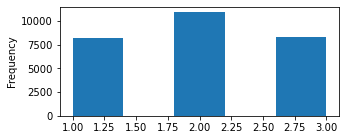

In [4]:
#посмотрим как распределены сегменты
fig, ax = plt.subplots(1, figsize=(5, 2))
df['EM_SEGMENT'].plot(kind='hist', ax=ax,  bins = 5)

# Раздел 1

В первую очередь, исходя из того, что Петя был невероятно уверен в интерпретируемости собственного файла, попробуем описать данные



'Id_client' – идентификатор клиента;

'InWeek_amount' – недельная выручка с клиента;
 
'InWeek_SKU' — количество товарных позиций за неделю,

 'Checkinmonth_average' — среднее количество чеков за месяц (?),

 'Checkamount_mean' - средний чек в месяц,
 
  'Count_transac' - количество транзакций суммарное,
  
 'Total_amount' — общая выручка с клиента,
 
  'Total_SKU_qnt' – общее число товарных позиций у клиента,

'Count_departments' — количество отделов, обслуживших клиента, 


'Count_shop' — количество магазинов, обслуживших клиента, 

'Count_city' — количество городов, в которых клиент обращался к нашему бизнесу,

 'Tenure' — время сотрудничества (?),

'SKU_meanbytransac' — среднее количество товарных позиций на транзакцию, 


'Amount_last6mnth' — выручка с клиента за последние 6 месяцев,


'Check_qntlast6mnth' - количество чеков за последние 6 месяцев,


'SKU_price_mean' — средняя стоимость приобретаемого товара,

'Gender' — пол,

 'Age' — возраст,
 
  'Age_group' — возрастная группа,
  
 'Interval_visit' — временной промежуток между визитами (?),

'Days_pastvisit' — количество дней в предыдущий визит, 

– кошачья бытовая химия (количество, выручка, доля)

'Cat_householdchem_qnt', Cat_householdchem_amount' , 
'Cat_householdchem_share',

– кошачие средства для ухода  (количество, выручка, доля)
 'Cat_careproducts_qnt', 'Cat_careproducts_amount' ,'Cat_careproducts_share' - доля кошачьего ухода, 

— кошачьи принадлежности для туалета (количество, выручка, доля)
'Cat_toiletries_qnt' 
'Cat_toiletries_amount' 
'Cat_toiletries_share' 

— кошачьи товары для здоровья (количество, выручка, доля)
'Cat_healthwellnes_qnt', 'Cat_healthwellnes_amount',
       'Cat_healthwellnes_share', 

— котяточные товары  (количество, выручка, доля)      
'Cat_babyprod_qnt', 'Cat_babyprod_amount',
       'Cat_babyprod_share', 


  
'Communication_3month'— коммуникация за последние 3 месяца    ,


'Response_communcation'– был получен ответ на коммуникацию ,


'SKU_LastMonthqnt' — количество товаров за последний месяц,

 'Checks_LastMonthqnt' - количество чеков за последний месяц, 

 'Amount_LastMonth' - выручка за последний месяц,


'Discount' — предоставлялась ли скидка (имеет ли право на скидку??), 

'Discount_LastMonth' — была ли скидка за последний месяц, 


'_SEGMENT_' — сегмент 1,

 'EM_SEGMENT' — сегмент полученный через метод максимального правдоподобия (?)

Так как мы все еще помним, заявления Пети о легкой интерпретируемости файла, проделаем несколько шагов. 


Во-первых, посмотрим совпадают ли между собой два последних поля с сегментами. Оценим вариативность полей таблицы (может что-то заведомо ненужно).

Во-вторых, проверим очевидные фильтры для сегментов, такие как возрастная группа, пол, недельная выручка и количество транзакций

In [5]:
print('количество противоречащих друг другу сегментов:', len(df[df['_SEGMENT_'] != df['EM_SEGMENT']]))
print('вариативность полей:')
for i in df.columns:
  if df[i].nunique() < 15:
    print( df[i].value_counts().sort_values(ascending = False).head(3),'\n' )

количество противоречащих друг другу сегментов: 0
вариативность полей:
2    21348
4     4941
6      947
Name: Checkinmonth_average, dtype: int64 

1    25457
2     1937
3      103
Name: Count_city, dtype: int64 

12    9942
7     4209
11    3439
Name: Tenure, dtype: int64 

F    18781
M     8486
Name: Gender, dtype: int64 

25-35    7132
35-45    6889
45-55    4948
Name: Age_group, dtype: int64 

1    27507
0        1
Name: Communication_3month, dtype: int64 

1    15057
0    12451
Name: Response_communcation, dtype: int64 

1    27455
0       53
Name: Discount, dtype: int64 

1    25330
0     2178
Name: Discount_LastMonth, dtype: int64 

2    10936
3     8325
1     8247
Name: _SEGMENT_, dtype: int64 

2    10936
3     8325
1     8247
Name: EM_SEGMENT, dtype: int64 



Закодируем категориальные переменные и посомтрим на корреляцию с сегментами

In [6]:
df['Gender_id'] =  np.where(df['Gender'] == 'M', 1, 0)
df['Age_group_id'] = np.nan
df['Age_group'] = df['Age_group'].fillna('unknown')
for i in range(7):
  my_list = sorted(list(df['Age_group'].unique()))
  df['Age_group_id'] = np.where(df['Age_group'] == my_list[i], i, df['Age_group_id'] )

In [7]:
correl = []
for i in df.columns:
  try:
    correl.append([i, round(df['EM_SEGMENT'].corr(df[i]), 2)])
  except:
    correl.append([i, 0.0001])
res = pd.DataFrame(correl).sort_values(1, ascending = False)
res[2:5]

,0,1
40,Amount_LastMonth,0.50
31,Cat_healthwellnes_amount,0.46
1,InWeek_amount,0.42


Можем смело делать вывод, что суммарная выручка, а также категория котячих товаров во многом определяют класс. Чтобы не мучиться с перебором разных комбинаций фильтров, попробуем использовать рандомный лес для того, чтобы классифицировать наших покупателей.

Кодировать нам ничего не надо

In [8]:
df.columns

Index(['Id_client', 'InWeek_amount', 'InWeek_SKU', 'Checkinmonth_average',
       'Checkamount_mean', 'Count_transac', 'Total_amount', 'Total_SKU_qnt',
       'Count_departments', 'Count_shop', 'Count_city', 'Tenure',
       'SKU_meanbytransac', 'Amount_last6mnth', 'Check_qntlast6mnth',
       'SKU_price_mean', 'Gender', 'Age', 'Age_group', 'Interval_visit',
       'Days_pastvisit', 'Cat_householdchem_qnt', 'Cat_householdchem_amount',
       'Cat_householdchem_share', 'Cat_careproducts_qnt',
       'Cat_careproducts_amount', 'Cat_careproducts_share',
       'Cat_toiletries_qnt', 'Cat_toiletries_amount', 'Cat_toiletries_share',
       'Cat_healthwellnes_qnt', 'Cat_healthwellnes_amount',
       'Cat_healthwellnes_share', 'Cat_babyprod_qnt', 'Cat_babyprod_amount',
       'Cat_babyprod_share', 'Communication_3month', 'Response_communcation',
       'SKU_LastMonthqnt', 'Checks_LastMonthqnt', 'Amount_LastMonth',
       'Discount', 'Discount_LastMonth', '_SEGMENT_', 'EM_SEGMENT',
       'Gend

In [9]:
cols = ['InWeek_amount', 'InWeek_SKU', 'Checkinmonth_average',
       'Checkamount_mean', 'Count_transac', 'Total_amount', 'Total_SKU_qnt',
       'Count_departments', 'Count_shop', 'Count_city', 'Tenure',
       'SKU_meanbytransac', 'Amount_last6mnth', 'Check_qntlast6mnth',
       'SKU_price_mean',  'Interval_visit',
       'Days_pastvisit', 'Cat_householdchem_qnt', 'Cat_householdchem_amount',
       'Cat_householdchem_share', 'Cat_careproducts_qnt',
       'Cat_careproducts_amount', 'Cat_careproducts_share',
       'Cat_toiletries_qnt', 'Cat_toiletries_amount', 'Cat_toiletries_share',
       'Cat_healthwellnes_qnt', 'Cat_healthwellnes_amount',
       'Cat_healthwellnes_share', 'Cat_babyprod_qnt', 'Cat_babyprod_amount',
       'Cat_babyprod_share', 'Communication_3month', 'Response_communcation',
       'SKU_LastMonthqnt', 'Checks_LastMonthqnt', 'Amount_LastMonth',
       'Discount', 'Discount_LastMonth',
       'Gender_id', 'Age_group_id']
X = df[cols]
Y = df['EM_SEGMENT'].values

In [10]:
X.sample(1)

,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,Count_city,Tenure,SKU_meanbytransac,Amount_last6mnth,Check_qntlast6mnth,SKU_price_mean,Interval_visit,Days_pastvisit,Cat_householdchem_qnt,Cat_householdchem_amount,Cat_householdchem_share,Cat_careproducts_qnt,Cat_careproducts_amount,Cat_careproducts_share,Cat_toiletries_qnt,Cat_toiletries_amount,Cat_toiletries_share,Cat_healthwellnes_qnt,Cat_healthwellnes_amount,Cat_healthwellnes_share,Cat_babyprod_qnt,Cat_babyprod_amount,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,Gender_id,Age_group_id
16487,413.6471,21,2,296.1916,29,8686.59,1007,25,1,1,10,9,998.88,1,8.385031,12,10,151,1656.68,0.190717,157,2625.77,0.302279,623,3575.4,0.4116,51,513.95,0.059166,25,314.79,0.036239,1,1,19,2,295.96,1,1,0,3.0


In [11]:
Y[:5]

array([2, 2, 3, 2, 1])

In [12]:
#разделим набор на тренировочный и тестовый
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [13]:
# создаем и тренируем модель, на параметрах из коробки
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [14]:
#определим, какие признаки оказались значимыми
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), cols[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.1872, 'Amount_LastMonth'],
 [0.118, 'Checks_LastMonthqnt'],
 [0.1017, 'SKU_LastMonthqnt'],
 [0.0683, 'Count_transac'],
 [0.0622, 'Days_pastvisit'],
 [0.0455, 'Cat_babyprod_amount'],
 [0.0453, 'Cat_babyprod_share'],
 [0.0435, 'Total_amount'],
 [0.0405, 'Checkamount_mean'],
 [0.0372, 'SKU_meanbytransac'],
 [0.0281, 'Cat_healthwellnes_amount'],
 [0.0232, 'Cat_healthwellnes_share'],
 [0.0163, 'InWeek_amount'],
 [0.0156, 'Cat_careproducts_amount'],
 [0.0119, 'Total_SKU_qnt'],
 [0.0114, 'Cat_householdchem_amount'],
 [0.0105, 'InWeek_SKU'],
 [0.0098, 'Cat_babyprod_qnt'],
 [0.0092, 'Checkinmonth_average'],
 [0.0092, 'Cat_careproducts_qnt'],
 [0.0091, 'Cat_healthwellnes_qnt'],
 [0.009, 'Count_departments'],
 [0.0088, 'Cat_householdchem_qnt'],
 [0.0086, 'Cat_toiletries_amount'],
 [0.0079, 'SKU_price_mean'],
 [0.0079, 'Check_qntlast6mnth'],
 [0.0075, 'Interval_visit'],
 [0.0073, 'Cat_toiletries_qnt'],
 [0.0068, 'Cat_toiletries_share'],
 [0.0056, 'Cat_careproducts_share'],
 [0.0055, 'Amount_la

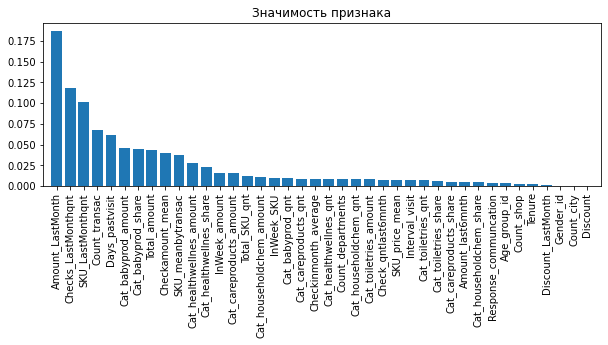

In [15]:
#визуализируем
d_first = len(cols[1:])
plt.figure(figsize=(10, 3))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(cols)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [16]:
print('r2:', round(r2_score(model.predict(X_test), y_test), 3))
print("Accuracy:", round(metrics.accuracy_score(y_test, model.predict(X_test)), 3))

r2: 0.825
Accuracy: 0.953


Что ж, наша модель даже из коробки достаточно точно смогла выделить признаки, которые изпользовал Петя для выделения сегментов клиентов. На основании полученных предикторов, похоже, что был использован RFM подход

Попробуем разметить наши данные на основании суммарной выручки за прошедший месяц, количество SKU за прошедший месяц, средние чек и глубину 

In [17]:
df.columns

Index(['Id_client', 'InWeek_amount', 'InWeek_SKU', 'Checkinmonth_average',
       'Checkamount_mean', 'Count_transac', 'Total_amount', 'Total_SKU_qnt',
       'Count_departments', 'Count_shop', 'Count_city', 'Tenure',
       'SKU_meanbytransac', 'Amount_last6mnth', 'Check_qntlast6mnth',
       'SKU_price_mean', 'Gender', 'Age', 'Age_group', 'Interval_visit',
       'Days_pastvisit', 'Cat_householdchem_qnt', 'Cat_householdchem_amount',
       'Cat_householdchem_share', 'Cat_careproducts_qnt',
       'Cat_careproducts_amount', 'Cat_careproducts_share',
       'Cat_toiletries_qnt', 'Cat_toiletries_amount', 'Cat_toiletries_share',
       'Cat_healthwellnes_qnt', 'Cat_healthwellnes_amount',
       'Cat_healthwellnes_share', 'Cat_babyprod_qnt', 'Cat_babyprod_amount',
       'Cat_babyprod_share', 'Communication_3month', 'Response_communcation',
       'SKU_LastMonthqnt', 'Checks_LastMonthqnt', 'Amount_LastMonth',
       'Discount', 'Discount_LastMonth', '_SEGMENT_', 'EM_SEGMENT',
       'Gend

In [18]:
df_result = df[['EM_SEGMENT','Amount_LastMonth', 'Checks_LastMonthqnt', 'SKU_LastMonthqnt',
               'Count_transac', 'Days_pastvisit', 'SKU_meanbytransac'
                , 'Cat_babyprod_share', 'Cat_healthwellnes_share'#, 
                #,'Age_group_id'#, 'Gender_id', 'InWeek_amount'
               ]]

In [19]:
quantiles = df_result[df_result.columns].quantile(q=[0.1, 0.5, 0.9])
quantiles

,EM_SEGMENT,Amount_LastMonth,Checks_LastMonthqnt,SKU_LastMonthqnt,Count_transac,Days_pastvisit,SKU_meanbytransac,Cat_babyprod_share,Cat_healthwellnes_share
0.1,1.0,241.065,2.0,12.0,23.0,1.0,1.0,0.009092,0.024659
0.5,2.0,825.895,6.0,37.0,66.0,4.0,4.0,0.047616,0.067024
0.9,3.0,1831.227,18.0,73.0,162.0,11.0,8.0,0.120740,0.137992


In [20]:
 def get_class(x,p,d):
  if x <= d[p][0.1]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.9]:
    return 2
  else:
    return 1

def get_target_class(x,p,d):
  if x <= d[p][0.5]:
    return 2
  else:
    return 1

df_result['Amount_Quartile'] = df_result['Amount_LastMonth'].apply(get_class, args=('Amount_LastMonth',quantiles,))
df_result['Checks_Quartile'] = df_result['Checks_LastMonthqnt'].apply(get_class, args=('Checks_LastMonthqnt',quantiles,))
df_result['SKU_Quartile'] = df_result['SKU_LastMonthqnt'].apply(get_class, args=('SKU_LastMonthqnt',quantiles,))
df_result['Days_Quartile'] = df_result['Days_pastvisit'].apply(get_class, args=('Days_pastvisit',quantiles,))
df_result['Trc_Quartile'] = df_result['Count_transac'].apply(get_class, args=('Count_transac',quantiles,))
df_result['SKU_by_tr_Quartile'] = df_result['SKU_meanbytransac'].apply(get_class, args=('SKU_meanbytransac',quantiles,))
df_result['Baby_Quartile'] = df_result['Cat_babyprod_share'].apply(get_class, args=('Cat_babyprod_share',quantiles,))
df_result['Helth_Quartile'] = df_result['Cat_healthwellnes_share'].apply(get_class, args=('Cat_healthwellnes_share',quantiles,))


df_result['get_class'] = df_result.Amount_Quartile.map(str) \
                            + df_result.Checks_Quartile.map(str) \
                            + df_result.Days_Quartile.map(str) \
                            + df_result.Trc_Quartile.map(str) \
                            + df_result.SKU_by_tr_Quartile.map(str) \
                             + df_result.SKU_Quartile.map(str) 

<ipython-input-20-76fcca8d0814>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Amount_Quartile'] = df_result['Amount_LastMonth'].apply(get_class, args=('Amount_LastMonth',quantiles,))
<ipython-input-20-76fcca8d0814>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Checks_Quartile'] = df_result['Checks_LastMonthqnt'].apply(get_class, args=('Checks_LastMonthqnt',quantiles,))
<ipython-input-20-76fcca8d0814>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [21]:
result = df_result.groupby(['get_class', 'EM_SEGMENT'], as_index = False)['Days_pastvisit'].count()
print(len(result))
#посмотрим как часто наш класс соответствует 2 классам Пети (спойлер – часто)
round(result.groupby('get_class', as_index = False)['EM_SEGMENT'].nunique().reset_index()['EM_SEGMENT'].mean(),2)

976


1.42

В полной мере набор предикторов, которые бы привели в соответствие сегменты с Петиными подобрать не удалось. Но так как время — деньги и маркетологи долго ждать не будут, проведем RFM сегментацию и добавим к разметке веса потребления отдельных продуктов


In [22]:
df.columns

Index(['Id_client', 'InWeek_amount', 'InWeek_SKU', 'Checkinmonth_average',
       'Checkamount_mean', 'Count_transac', 'Total_amount', 'Total_SKU_qnt',
       'Count_departments', 'Count_shop', 'Count_city', 'Tenure',
       'SKU_meanbytransac', 'Amount_last6mnth', 'Check_qntlast6mnth',
       'SKU_price_mean', 'Gender', 'Age', 'Age_group', 'Interval_visit',
       'Days_pastvisit', 'Cat_householdchem_qnt', 'Cat_householdchem_amount',
       'Cat_householdchem_share', 'Cat_careproducts_qnt',
       'Cat_careproducts_amount', 'Cat_careproducts_share',
       'Cat_toiletries_qnt', 'Cat_toiletries_amount', 'Cat_toiletries_share',
       'Cat_healthwellnes_qnt', 'Cat_healthwellnes_amount',
       'Cat_healthwellnes_share', 'Cat_babyprod_qnt', 'Cat_babyprod_amount',
       'Cat_babyprod_share', 'Communication_3month', 'Response_communcation',
       'SKU_LastMonthqnt', 'Checks_LastMonthqnt', 'Amount_LastMonth',
       'Discount', 'Discount_LastMonth', '_SEGMENT_', 'EM_SEGMENT',
       'Gend

In [23]:
rfm = df[['Id_client', 'Age', 'Age_group_id', 'Gender', 'Gender_id', 'Interval_visit', 'Checks_LastMonthqnt', 'Amount_LastMonth', 'Cat_babyprod_share',
         'Cat_healthwellnes_share', 'Cat_careproducts_share', 'Cat_toiletries_share', 'Cat_householdchem_share', 'EM_SEGMENT']].copy()
rfm.sample()

,Id_client,Age,Age_group_id,Gender,Gender_id,Interval_visit,Checks_LastMonthqnt,Amount_LastMonth,Cat_babyprod_share,Cat_healthwellnes_share,Cat_careproducts_share,Cat_toiletries_share,Cat_householdchem_share,EM_SEGMENT
12664,196026,30.0,1.0,F,0,12,5,1550.75,0.087114,0.083181,0.4297,0.203666,0.196339,3


In [24]:
quantiles = rfm[rfm.columns].quantile(q=[0.1, 0.5, 0.9])
quantiles

,Id_client,Age,Age_group_id,Gender_id,Interval_visit,Checks_LastMonthqnt,Amount_LastMonth,Cat_babyprod_share,Cat_healthwellnes_share,Cat_careproducts_share,Cat_toiletries_share,Cat_householdchem_share,EM_SEGMENT
0.1,46447.7,26.0,1.0,0.0,11.0,2.0,241.065,0.009092,0.024659,0.186496,0.166802,0.128329,1.0
0.5,211786.0,41.0,2.0,0.0,13.0,6.0,825.895,0.047616,0.067024,0.319790,0.291659,0.223681,2.0
0.9,371309.9,63.0,4.0,1.0,26.0,18.0,1831.227,0.120740,0.137992,0.476276,0.470325,0.339210,3.0


In [25]:
#определим балы в соответствии с заданнами рамками
rfm['r_quartile'] = rfm['Interval_visit'].apply(get_class, args=('Interval_visit',quantiles,))
rfm['f_quartile'] = rfm['Checks_LastMonthqnt'].apply(get_class, args=('Checks_LastMonthqnt',quantiles,))
rfm['m_quartile'] = rfm['Amount_LastMonth'].apply(get_class, args=('Amount_LastMonth',quantiles,))

rfm['rfm_score'] = rfm['r_quartile'].map(str) \
                            + rfm['f_quartile'].map(str) \
                            + rfm['m_quartile'].map(str) 

In [26]:
#добавим поле с приоритетной категорией товаров
def get_product_type(row):
    '''функция присвоения типов потребляемых продуктов'''
    my_list = [row['Cat_babyprod_share'], row['Cat_healthwellnes_share'], row['Cat_careproducts_share'],
             row['Cat_toiletries_share'],  row['Cat_householdchem_share'] ]
    if max(my_list) == my_list[0]:
        return 'baby_prod'
    elif max(my_list) == my_list[1]:
        return 'health_prod'
    elif max(my_list) == my_list[2]:
        return 'care_prod'
    elif max(my_list) == my_list[3]:
        return 'toilet_prod'
    else:
        return 'house_prod'

In [27]:
#присвоим тип  зависимости от наиболее потребляемого продукта
rfm['product_type'] = rfm.apply(get_product_type, axis = 1)
rfm['product_type_id'] = np.nan
for i in range(len(rfm['product_type'].unique())):
    my_list = sorted(list(rfm['product_type'].unique()))
    rfm['product_type_id'] = np.where(rfm['product_type'] == my_list[i], i, rfm['product_type_id'] )

rfm.head()

,Id_client,Age,Age_group_id,Gender,Gender_id,Interval_visit,Checks_LastMonthqnt,Amount_LastMonth,Cat_babyprod_share,Cat_healthwellnes_share,Cat_careproducts_share,Cat_toiletries_share,Cat_householdchem_share,EM_SEGMENT,r_quartile,f_quartile,m_quartile,rfm_score,product_type,product_type_id
0,5743,37.0,2.0,F,0,11,12,963.01,0.081007,0.085479,0.281507,0.330391,0.221616,2,4,2,2,422,toilet_prod,4.0
1,5756,29.0,1.0,F,0,11,15,1534.69,0.036766,0.081391,0.310741,0.254921,0.316181,2,4,2,2,422,house_prod,3.0
2,5781,33.0,1.0,F,0,29,2,1514.48,0.112974,0.112970,0.679295,0.053815,0.040946,3,1,4,2,142,care_prod,1.0
3,5801,50.0,3.0,F,0,11,35,1872.24,0.027406,0.055340,0.258902,0.395256,0.263096,2,4,1,1,411,toilet_prod,4.0
4,5808,33.0,1.0,F,0,14,3,557.97,0.042788,0.267573,0.325343,0.106738,0.257558,1,2,3,3,233,care_prod,1.0


Теперь сформируем сегменты с описанием для отдела маркетинга

**первая группа** 
R = 1, F = 1/2  M = 1/2/3/4 – клиенты на грани оттока, давно ничего не покупали, но были лояльны и покупали много (имеет смысл их пропушить)

**вторая группа** 
R = 1, F = 3/4  M = 3/4 – клиенты на грани оттока, которые платят мало и редко (тут можно "довесить" типом потребляемых продуктов)

**третья группа** 
R = 1/2, F = 3/4  M = 1/2 – покупатели, сделавшие почти разовый, но крупный платеж, может они мимопроходили, а может их надо акцией какой заманить

**четвертая группа** 
R = 2/3, F = 1/2  M = 1/2/3/4 — лояльные пользователи, относительно недавно совершившие небольшое число покупок (интересно, можно ли им предложить закончившийся кошачий туалет или средство от блох?)

**пятая группа** 
R = 2/3, F = 3/4, M = 3/4 – покупатели, которые относительно недавно произвели небольшое количество мелких покупок (в зависимости от типа приобретаемых товаров, имеет смысл предложить им к нам вернуться уже сейчас, не откладывая покупки на следующий месяц)

**шестая группа** 
R = 3, F = 3/4, M = 1/2 – покупатели, которые относительно недавно произвели небольшое количество крупных покупок (стоит оценить тип приобретаемых товаров)

**седьмая группа** 
R = 4 F = 3/4  M = 1/2/3/4 – лояльные клиенты, которые недавно совершили небольшое число покупок, продолжаем их стимулировать 

**восьмая группа** 
R = 4 F = 1/2  M = 1/2/3/4 – самая лояльная группа, совершившая большое число платежей за прошедший период

In [28]:
#сформируем списки в соответствии с заявленными группами
first_group = ['111', '112', '113', '114', '121', '122', '123', '124']
second_group = ['133', '134', '143', '144']
third_group = ['131', '132', '141', '142', '231', '232', '241', '242']
forth_group = ['211', '212', '213', '214', '221', '222', '223', '224', '311', '312', '313', '314','321', '322', '323', '324']
fifth_group = ['233', '234', '243', '244', '333', '334', '343', '344']
sixth_group = ['331', '332', '341', '342']
seventh_group = ['431', '432','433', '434', '441', '442', '443', '444']
eighth_group = ['411', '412', '413', '414', '421', '422', '423', '424']

In [29]:
#проверим никого ли не забыли
check_list = first_group + second_group + third_group + forth_group + fifth_group + sixth_group + seventh_group + eighth_group
set(check_list).difference(set(rfm['rfm_score'].unique()))

{'113', '114'}

In [30]:
#назначим клиентам сегменты и отпустим их с миром

def get_rfm_type(row):

    if row['rfm_score'] in first_group:
        return 'first_group'
    elif row['rfm_score'] in second_group:
        return 'second_group'
    elif row['rfm_score'] in third_group:
        return 'third_group'
    elif row['rfm_score'] in forth_group:
        return 'forth_group'
    elif row['rfm_score'] in fifth_group:
        return 'fifth_group'
    elif row['rfm_score'] in sixth_group:
        return 'sixth_group'
    elif row['rfm_score'] in seventh_group:
        return 'seventh_group'
    else:
        return 'eighth_group'
    
rfm['rfm_type'] = rfm.apply(get_rfm_type, axis = 1)

In [31]:
clients_type = rfm.groupby([ 'rfm_type'], as_index = False).agg({
    'Cat_babyprod_share' : 'median',
    'Cat_healthwellnes_share' : 'median',
    'Cat_careproducts_share' : 'median',
    'Cat_toiletries_share' : 'median',
    'Cat_householdchem_share' : 'median',
    'EM_SEGMENT' : 'mean',
    'Id_client': 'count', 
    'Amount_LastMonth' : 'mean'
    }).sort_values('Id_client', ascending = False)

In [32]:
clients_type

,rfm_type,Cat_babyprod_share,Cat_healthwellnes_share,Cat_careproducts_share,Cat_toiletries_share,Cat_householdchem_share,EM_SEGMENT,Id_client,Amount_LastMonth
3,forth_group,0.040216,0.061599,0.328467,0.295980,0.226474,2.116107,8251,1182.297439
1,fifth_group,0.054751,0.069545,0.308845,0.293666,0.221434,1.554337,6929,419.858332
0,eighth_group,0.032945,0.060478,0.333618,0.295912,0.231080,2.055388,4983,1293.499765
7,third_group,0.067124,0.081375,0.308851,0.273701,0.217207,2.880168,2612,1288.711539
4,second_group,0.073024,0.071815,0.301531,0.284911,0.213093,1.436799,1962,347.223787
5,seventh_group,0.044227,0.073841,0.323293,0.285153,0.215815,1.958284,1678,712.057396
6,sixth_group,0.045643,0.081846,0.315105,0.279857,0.217746,2.832311,978,1339.084969
2,first_group,0.056773,0.055820,0.334253,0.304220,0.228088,1.947826,115,778.744348


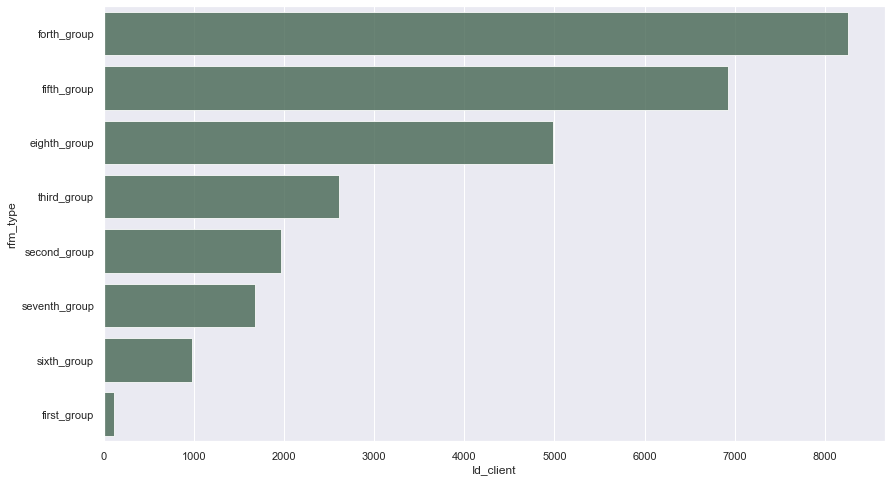

In [33]:
sns.set (style='whitegrid')
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.barplot(y='rfm_type', x='Id_client', data=clients_type, color="#3f6c51", alpha = 0.8)
plt.show()

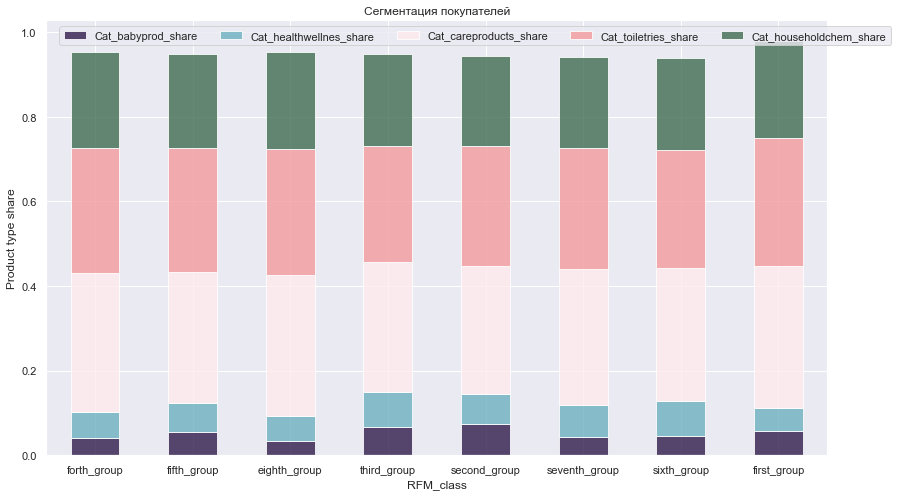

In [34]:
sns.set (style='whitegrid')

plot_stack = clients_type[clients_type.columns[:-3]]

own_colors = ["#301a4b","#6db1bf","#ffeaec","#f39a9d","#3f6c51"]
sns.set()
sns.set(rc={'figure.figsize':(14,8)})

plot_stack.set_index('rfm_type').plot ( kind = 'bar', stacked = True, color=own_colors, alpha = 0.8)
plt.xlabel ('RFM_class')
plt.ylabel ('Product type share')
plt.legend(loc='lower left', bbox_to_anchor=(0.01, 0.93), ncol = 5)
plt.title ('Сегментация покупателей')
plt.xticks(rotation=0)
plt.show ()
